In [441]:
# Exercise 1

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_actu = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
y_pred = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
M=confusion_matrix(y_actu, y_pred)
print(M)

print('Precision: %.3f' % precision_score(y_true=y_actu, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_actu, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_actu, y_pred=y_pred))
print('Accuracy: %.3f' % accuracy_score(y_true=y_actu, y_pred=y_pred))

# Recall: In the case of preliminary disease screening of patients for follow-up examinations, the optimal ratio would be at 1.0 as we would like to spot all the patients that have the disease even if it means acceptings a low precision. However the costs of examinations must be low 
# Precision: In the case of Email Spam Detection, we need a large precision. If the precision is not high, there's a change that important emails are categorized as spam (FP)
# Accuracy: Accuracy is not a good performance when there is a large class imbalance. Let's stay if it's best to be FP than FP, this particular  key measure doesn't bring any usefulness to the model. 

[[16  4]
 [ 8 32]]
Precision: 0.889
Recall: 0.800
F1: 0.842
Accuracy: 0.800


In [535]:
# Exercise 3

%reset -f
import operator
import random
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame([[20, 'f', 10, 'E-mail'], # Putting the data into a dataframe
                   [30, 'm', 90, 'Phone'],
                   [40, 'm', 70, 'Post'],
                   [60, 'f', 100, 'Phone'],
                   [20, 'm', 30, 'E-mail'],
                   [30, 'f', 40, 'E-mail'],
                   [70, 'm', 80, 'Post'],
                   [20, 'f', 110, 'Phone'],
                   [60, 'm', 80, 'Post'],
                   [40, 'f', 20, 'E-mail']])

df.columns = ['Age', 'm/f', 'Sales', 'Channel'] # Naming the columns


class_mapping = {label: idx for idx, label in enumerate(np.unique(df['m/f']))} # Transforming the class m/f into binary variables
class_mapping

df['m/f'] = df['m/f'].map(class_mapping)



class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Channel']))} # Transforming the class Channel into variables
class_mapping

df['Channel'] = df['Channel'].map(class_mapping)




X1 = df[['Age']].values # Normalizing column Age 

min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X1)
df_normalized = pd.DataFrame(np_scaled)


X2 = df[['Sales']].values # Normalizing column Sales 

np_scaled1 = min_max_scaler.fit_transform(X2)
df_normalized1 = pd.DataFrame(np_scaled1)

df['Age'] = df_normalized
df['Sales'] = df_normalized1


print(df)

# Question b

train_data=[]
test_data=[]

dataset=df.values  # Split the data in case we want to test further the power of prediction of the model. However here we don't need it.
for x in range(len(dataset)):
        for y in range(3):
            dataset[x][y] = float(dataset[x][y])
        if random.random() > 0:
            train_data.append(dataset[x])
        else:
            test_data.append(dataset[x])


print('Train: ' + repr(len(train_data)))
print( 'Test: ' + repr(len(test_data)))


def euclideanDistance(instance1, instance2, length): # Set up a function to calculate the Euclidean distance which will permit to define the nearest neigbours
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k): # Set up the function to identify the neareast neighbours 
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors


test1=(0.2,1,0.45,'a')
test2=(1.3,0,0.9,'b')

k = 3

neighbors = getNeighbors(train_data, test1, k)
neighbors1 = getNeighbors(train_data, test2, k)

print(neighbors)
print(neighbors1)

# As we can see for the last new customer the majority heads towards 2 which is by post. As for the first new customer it is
# undefined as the nearest neigbhours all have the 3 different type of classes. 

   Age  m/f  Sales  Channel
0  0.0    0    0.0        0
1  0.2    1    0.8        1
2  0.4    1    0.6        2
3  0.8    0    0.9        1
4  0.0    1    0.2        0
5  0.2    0    0.3        0
6  1.0    1    0.7        2
7  0.0    0    1.0        1
8  0.8    1    0.7        2
9  0.4    0    0.1        0
Train: 10
Test: 0
[array([0.4, 1. , 0.6, 2. ]), array([0. , 1. , 0.2, 0. ]), array([0.2, 1. , 0.8, 1. ])]
[array([0.8, 0. , 0.9, 1. ]), array([1. , 1. , 0.7, 2. ]), array([0.8, 1. , 0.7, 2. ])]


/opt/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [391]:
# Exercise 5

import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

df = pd.DataFrame([[5, 80, 'no', 'Action'], # Putting the data into a dataframe
                       [15, 120, 'yes', 'Drama'],
                       [15, 100,'yes', 'Action'],
                       [20, 80, 'no', 'Drama'],
                       [5, 80, 'no', 'Action']])

df.columns = ['Roles', 'Duration (min)', 'Audiobook', 'Genre']



def find_entropy(df): # Finding the attribute of the desired class (genre)
    Class = df.keys()[-1]   
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy
  
  
def find_entropy_attribute(df,attribute): # Finding the entropy of the attribute in order to calculate Information Gain
    Class = df.keys()[-1]  
    target_variables = df[Class].unique()  
    variables = df[attribute].unique()   
    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
            den = len(df[attribute][df[attribute]==variable])
            fraction = num/(den+eps)
            entropy += -fraction*log(fraction+eps)
        fraction2 = den/len(df)
        entropy2 += -fraction2*entropy
    return abs(entropy2)

def find_winner(df): #Setting-up the code to find the winners and calculate Information Gain
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]
  
def get_subtable(df, node,value): #Getting the subtable to separate classes
    return df[df[node] == value].reset_index(drop=True)


def buildTree(df,tree=None): 
    Class = df.keys()[-1]  
    node = find_winner(df)
    
    attValue = np.unique(df[node])

    #Create an empty dictionary to create tree    
    if tree is None:                    
        tree={}
        tree[node] = {}
    
   #We make a loop to construct the tree with regards to the purity 

    for value in attValue:
        
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable['Genre'],return_counts=True)                        
        
        if len(counts)==1:#Checking purity 
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable)
                   
    return tree

tree = buildTree(df)

import pprint # We see here that audiobook is not implemented in the tree as it doesn't give any information about the genre. 
pprint.pprint(tree)


def predict(inst,tree): #Function built to go through the tree recusirvely. 

    for nodes in tree.keys():        
        
        value = inst[nodes]
        tree = tree[nodes][value]
        prediction = 0
            
        if type(tree) is dict:
            prediction = predict(inst, tree)
        else:
            prediction = tree
            break;                            
        
    return prediction


# In order to predict, we had to change the data given for the movies as the parameters didn't correpond.
# We took the closest values to estimate the genre

inst1=pd.Series({'Roles':15,'Duration (min)': 120, 'Audiobook':'yes'}) 

prediction1=predict(inst1, tree)
print(prediction1)

inst2=pd.Series({'Roles':5,'Duration (min)': 120, 'Audiobook':'yes'})

prediction1=predict(inst2, tree)
print(prediction1)





{'Roles': {5: 'Action',
           15: {'Duration (min)': {100: 'Action', 120: 'Drama'}},
           20: 'Drama'}}
Drama
Action


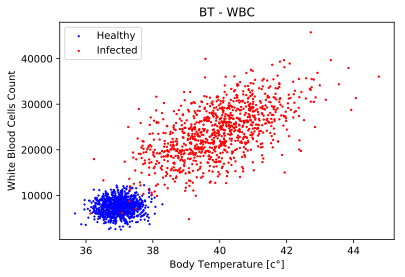

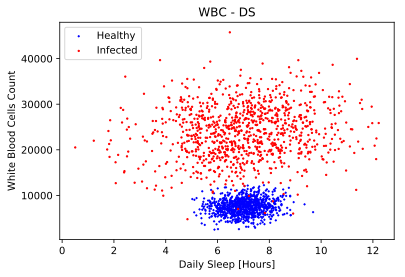

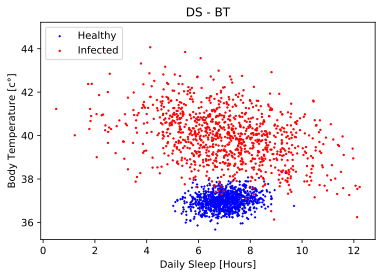

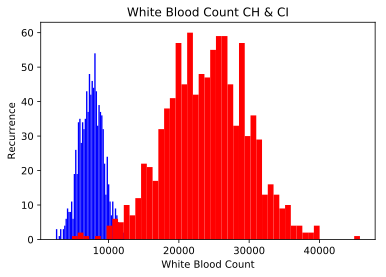

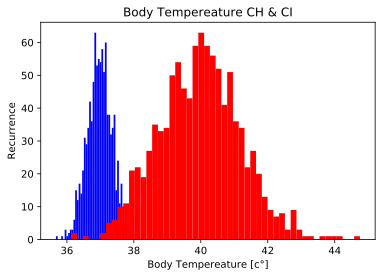

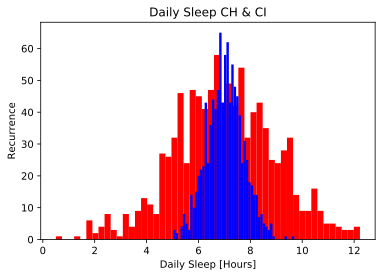

          0         1         2         3
0  1.000000  0.890329 -0.169303  0.854602
1  0.890329  1.000000  0.058523  0.887568
2 -0.169303  0.058523  1.000000 -0.002387
3  0.854602  0.887568 -0.002387  1.000000


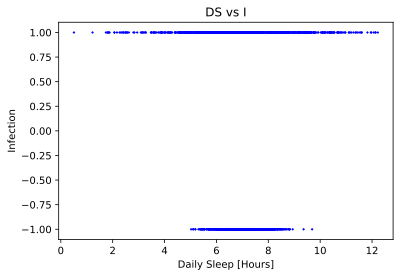

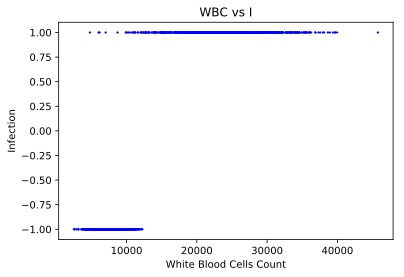

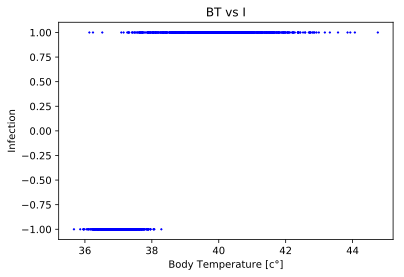

In [485]:
# Exercise 7

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

data = pd.read_csv('data.txt', header=None,sep='\s+') # Import data

BT = data[0] # Separate data into the different variables
WBC = data[1]
DS = data[2]
I = data[3]


data_infected = [] # Separate the data depending on infection
data_healthy = []
for i in range (len(data)):
    if data.iloc[i, 3] > 0:
        data_infected.append(data.iloc[i,:])
    else:
        data_healthy.append(data.iloc[i,:])


BT_healthy = [] # Create subcategory in each variable depending on infection or not
for i in range (len(data_healthy)):
    BT_healthy.append(data_healthy [i][0])
    
WBC_healthy = []    
for i in range (len(data_healthy)):
    WBC_healthy.append(data_healthy [i][1])
    
DS_healthy = []    
for i in range (len(data_healthy)):
    DS_healthy.append(data_healthy [i][2])
    
BT_infected = []    
for i in range (len(data_infected)):
    BT_infected.append(data_infected [i][0])
    
WBC_infected = []    
for i in range (len(data_infected)):
    WBC_infected.append(data_infected [i][1])
    
DS_infected = []    
for i in range (len(data_infected)):
    DS_infected.append(data_infected [i][2])
    
    
fig = plt.figure() # Plotting the graphs accordingly
Graph1 = fig.add_subplot(111)
Graph1.scatter(BT_healthy, WBC_healthy, s=2, c='b', marker="x", label='Healthy')
Graph1.scatter(BT_infected,WBC_infected, s=2, c='r', marker="o", label='Infected')
plt.legend(loc='upper left');
plt.title('BT - WBC')
plt.xlabel('Body Temperature [c°]')
plt.ylabel('White Blood Cells Count')
plt.show()

fig = plt.figure()
Graph1 = fig.add_subplot(111)
Graph1.scatter(DS_healthy, WBC_healthy, s=2, c='b', marker="x", label='Healthy')
Graph1.scatter(DS_infected,WBC_infected, s=2, c='r', marker="o", label='Infected')
plt.legend(loc='upper left');
plt.title('WBC - DS')
plt.xlabel('Daily Sleep [Hours]')
plt.ylabel('White Blood Cells Count')
plt.show()

fig = plt.figure()
Graph1 = fig.add_subplot(111)
Graph1.scatter(DS_healthy, BT_healthy, s=2, c='b', marker="x", label='Healthy')
Graph1.scatter(DS_infected,BT_infected, s=2, c='r', marker="o", label='Infected')
plt.legend(loc='upper left');
plt.title('DS - BT')
plt.xlabel('Daily Sleep [Hours]')
plt.ylabel('Body Temperature [c°]')
plt.show()

# Part B 


NormWBC_infected = preprocessing.normalize([WBC_infected]) # Normalizing data
NormWBC_healthy = preprocessing.normalize([WBC_healthy])
x = NormWBC_healthy.tolist()
y = NormWBC_infected.tolist()

fig = plt.figure() # Plotting the graphs accordingly
plt.hist(WBC_healthy, bins = 50, facecolor = 'blue')
plt.hist(WBC_infected, bins = 50, facecolor = 'red')
plt.title('White Blood Count CH & CI')
plt.xlabel('White Blood Count')
plt.ylabel('Recurrence')
plt.show()

fig = plt.figure()
plt.hist(BT_healthy, bins = 50, facecolor = 'blue')
plt.hist(BT_infected, bins = 50, facecolor = 'red')
plt.title('Body Tempereature CH & CI')
plt.xlabel('Body Tempereature [c°]')
plt.ylabel('Recurrence')
plt.show()

fig = plt.figure()
plt.hist(DS_infected, bins = 50, facecolor = 'red')
plt.hist(DS_healthy, bins = 50, facecolor = 'blue')
plt.title('Daily Sleep CH & CI')
plt.xlabel('Daily Sleep [Hours]')
plt.ylabel('Recurrence')
plt.show()



# Answer to Part C: 

# There are two attributes that stand out in the graphs regarding the infection status: White Blood Count and Body Temperature.
# This is based on two critera, the mean and the standard deviation that are quite different from the CH and CI. This can be noticed visually.
# However if I had too choose only one, I would choose the White Blood Count as the two distributions seem to be the least overlapping ones.


# Part D:

Corr = data.corr()
print(Corr)

#White Blood Count is the one with the highest correlation to the infection status and it is consistent with our previsous reasonning. 

# Part E: 


fig = plt.figure() # Plotting the graphs accordingly
Graph1 = fig.add_subplot(111)
Graph1.scatter(DS,I, s=2, c='b', marker="x")
plt.title('DailySleep vs Infection status')
plt.xlabel('Daily Sleep [Hours]')
plt.ylabel('Infection')
plt.show()

fig = plt.figure()
Graph1 = fig.add_subplot(111)
Graph1.scatter(WBC,I, s=2, c='b', marker="x")
plt.title('White Blood Cells counts vs Infection status')
plt.xlabel('White Blood Cells Count')
plt.ylabel('Infection')
plt.show()

fig = plt.figure()
Graph1 = fig.add_subplot(111)
Graph1.scatter(BT,I, s=2, c='b', marker="x")
plt.title('Body Temperature vs Infection status')
plt.xlabel('Body Temperature [c°]')
plt.ylabel('Infection')
plt.show()


# We see the correlation reflected in the none overlapping feature of the infectious and non-infectious persons. 
# Indeed, it is almoste as if the chart was separeted in two part. A 100% correlation would in that case give the aformentionned result.
# This graph is a good basis to construct a logit or probit regression model. Indeed, a clear separation would probably give
# decent explanatory and predictions results. 


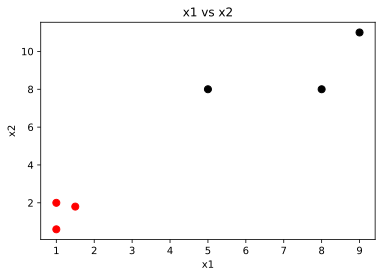

LDA prediction:  [0]
Perceptron prediction:  [0]
SVM prediction:  [0]


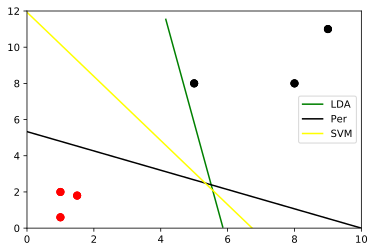

In [542]:
# Exercise 9 

import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC


x1 = [1, 5, 1.5, 8, 1, 9]
x2 = [ 2, 8, 1.8, 8, 0.6, 11]
X = np.array([[1, 5, 1.5, 8, 1, 9],[2, 8, 1.8, 8, 0.6, 11]])
X = X.transpose()
y = np.array([0,1,0,1,0,1])


fig = plt.figure()
Graph1 = fig.add_subplot(111)
colormap = np.array(['r', 'k'])
Graph1.scatter(x1,x2, s=50, c=colormap[y], marker="o")
plt.title('x1 vs x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Looking at the chart we see that they are two definite type of clusters: one on the lower left corner
# and the other one on the upper left corner. 

# LDA

clf = LinearDiscriminantAnalysis(n_components=2)
X_1 = clf.fit(X, y).transform(X)


plt.scatter(x1,x2, s=50, c=colormap[y], marker="o")
ymin, ymax = plt.ylim()
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (clf.intercept_[0]) / w[1]
axes = plt.gca()
axes.set_xlim([0,10])
axes.set_ylim([0,12])
plt.plot(yy,xx, 'k-', color='green', label='LDA')


# Perceptron

Per = Perceptron(tol=1e-3, random_state=0)
X_2 = Per.fit(X, y)

Per.score(X, y) 

plt.scatter(x1,x2, s=50, c=colormap[y], marker="o")
ymin, ymax = plt.ylim()
w = Per.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (Per.intercept_[0]) / w[1]
axes = plt.gca()
axes.set_xlim([0,10])
axes.set_ylim([0,12])
plt.plot(yy,xx, 'k-', color='black', label='Per')
plt.legend()

# SVM

SV = SVC(gamma='auto', kernel='linear')
SV.fit(X, y)

plt.scatter(x1,x2, s=50, c=colormap[y], marker="o")
ymin, ymax = plt.ylim()
w = SV.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (SV.intercept_[0]) / w[1]
axes = plt.gca()
axes.set_xlim([0,10])
axes.set_ylim([0,12])
plt.plot(yy,xx, 'k-', color='yellow', label='SVM')
plt.legend()

# Predictions

print('LDA prediction: ',clf.predict([[0.58, 0.76]]))
print('Perceptron prediction: ',Per.predict([[0.58, 0.76]]))
print('SVM prediction: ',SV.predict([[0.58, 0.76]]))






